<a href="https://colab.research.google.com/github/albertos-2002/SF3/blob/main/elettronica/esperienza_07__shaper/Esperienza_7_(dati_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

regrlin_pear_errpost_xys(input_x, input_y, input_sigma)

retta_fit_xba(x, b,a)

chi_quadro_lineare(y_vec, x_vec, sigma_vec, inte, pend, stringa_ytitle, stringa_xtitle, stringa_titolo)

intersezione_2rette(int1, err_int1, pend1, err_pend1, cov1, int2, err_int2, pend2, err_pend2, cov2)

chi_quadro(y_vec, x_vec, sigma_vec, y_ref, stringa_ytitle, stringa_xtitle, stringa_titolo, bolean_parameter)

Valori teorici assegnati al gruppo 27

$R_{in} =  47 \ K\Omega$

$C_f = 330 \ \ pF$

$R_f =  560\ K\Omega$

$C_{shap} = 150 \ \ pF$

$R_{shap} = 100\ K\Omega$

In [2]:
#@title misura delle componenti e calcolo di tau

r_fint = 100.67 *1000 #kohm scala 1k kohm
c_fdev = (174 - 24) /1000000000000 #pf scala 1nf
r_fdev = 101.23 *1000 #kohm scala 1k ohm
c_fint = (174 - 26) /1000000000000 #pf scala 1nf

err_r_fint = math.sqrt(1/3)* math.sqrt( (r_fint*0.07/100)**2 + (8)**2 )                             #ipotesi uniforme
err_c_fint = math.sqrt(1/3)* math.sqrt( (c_fint*2.5/100)**2 + (15/1000000000000)**2 )
err_r_fdev = math.sqrt(1/3)* math.sqrt( (r_fdev*0.07/100)**2 + (8)**2 )
err_c_fdev = math.sqrt(1/3)* math.sqrt( (c_fdev*2.5/100)**2 + (15/1000000000000)**2 )

print("err_r_fint ohm\n", err_r_fint)
print("\n err_c_fint farad\n", err_c_fint)
print("\n err_r_fdev ohm\n", err_r_fdev)
print("\n err_c_fdev farad\n", err_c_fdev)

tau_int = r_fint * c_fint
err_tau_int = tau_int * math.sqrt( ( err_r_fint/r_fint )**2 + ( err_c_fint/c_fint )**2 )            #propagazione semplice
print("\nTau integratore\n", tau_int*1000000, " \pm ", err_tau_int*1000000, " [micros] ")
print("\nf_t integratore\n", 1/(2*math.pi*tau_int) , " \pm ", (1/(2*math.pi*tau_int))*(err_tau_int/tau_int))

tau_dev = r_fdev * c_fdev
err_tau_dev = tau_dev * math.sqrt( ( err_r_fdev/r_fdev )**2 + ( err_c_fdev/c_fdev )**2 )            #propagazione semplice
print("\nTau derivatore \n", tau_dev*1000000, " \pm ", err_tau_dev*1000000, " [micros] ")
print("\nf_t derivatore\n", 1/(2*math.pi*tau_dev), " \pm ", (1/(2*math.pi*tau_dev))*(err_tau_dev/tau_dev) )

err_r_fint ohm
 40.946631774380016

 err_c_fint farad
 8.919828099987876e-12

 err_r_fdev ohm
 41.1715165334806

 err_c_fdev farad
 8.926785535678562e-12

Tau integratore
 14.89916  \pm  0.8979795436481585  [micros] 

f_t integratore
 10682.142019543071  \pm  643.8178404617512

Tau derivatore 
 15.1845  \pm  0.9036796024192743  [micros] 

f_t derivatore
 10481.408218373694  \pm  623.7831217079294


In [3]:
#compatibilità tra i due tau (teoricamente uguali)
comp = (15.1845 - 14.89916) / math.sqrt( ( 0.9036796024192743 )**2 + ( 0.8979795436481585 )**2 )
print(comp)

0.22397670458559646


#Dati

## ❌ **(2.1)  shaper base**

Onda quadra in ingresso:

$f = 100 \ Hz$

$V_{pre}^{ideal} = +1.0 \ V$

Tempo caratteristico teorico è stato calcolato sopra

Calcolo dei valori teorici di $V_{max}$  e  $T_{max}$

In [ ]:
#il t max dovrebbe essere uguale a tau
t_th_max = ? #microsecondi
err_t_th_max = ? #microsecondi

#come vin prendiamo il valore dell oscilloscopio
v_th_max = 1/math.e
print(v_th_max)
err_v_th_max = math.sqrt(1/3)* math.sqrt( (0.1* div? )**2 + (3/100)**2 )
print(err_v_th_max)

In [ ]:
#valori sperimentali

v_pre_max = ? #V scala 100mv
err_v_pre_max = math.sqrt(1/3)* math.sqrt( (0.1* div? )**2 + ( v_pre_max *3/100)**2 )
print("err vmax")
print(err_v_pre_max)
t_sh_max = ? #micros scala 10 micros
err_t_sh_max = 0.04* div? #microsecondi
print("errore tempo")
print(err_t_sh_max)

In [ ]:
#compatibilità
print( ( - ) / math.sqrt( ()**2 + ()**2 ) )

Misura del massimo e del suo tempo

?

Verifica della baseline

?

## 🟢 **(2.2) bode shaper**

In [24]:
frequenza_khz_b = [ 0.215, 0.464, 1, 2.15, 4.64,  5  , 10,   11   ,  17   , 21.5,  23  , 29  , 35  , 46.4, 100, 215, 464, 1000, 2150, 4640] #khz

v_out_b = [ 0.0216, 0.0456, 0.096, 0.206, 0.412,  0.432   , 0.676, 0.704  ,  0.804   , 0.836,  0.802 , 0.832  ,  0.812 , 0.764, 0.516, 0.286, 0.149, 0.0888, 0.0656, 0.0456 ] #V
v_in_b = [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] #V

v_out_div_b = [ 0.02, 0.02, 0.02, 0.05, 0.05,    0.1    , 0.1,  0.1  ,  0.1   , 0.1,   0.1  ,  0.1 ,  0.1 , 0.1, 0.1, 0.05, 0.02, 0.02, 0.02, 0.02 ] #V
v_in_div_b = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2] #V

## 🟠 **(2.3) compensazione polo-zero**

In [10]:
freq_bpz = [ 0.01, 0.0215, 0.0464, 0.1, 0.215, 0.464, 1, 2.15, 4.64, 10, 21.5, 46.4, 100, 215 ] #KHz
v_out_bpz = [ 0.928, 0.928, 0.928, 0.928, 0.928, 0.920, 0.912, 0.912, 0.864, 0.684, 0.416, 0.184, 0.0632, 0.0216 ] #V
v_out_div_bpz = [ 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.05, 0.05, 0.02, 0.02 ]
v_in_bpz = [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ] #V
v_in_div_bpz = [ 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5 ]

Visualizzazione del segnale in entrata allo shaper (confrontare con segnale out dell'esperienza 6)

?

Riportiamo la forma (totale) della curva in uscita dallo shaper

?

Visualizzazione del massimo e del suo tempo e dell'ampiezza dell'audershoot (uscita dallo shaper)

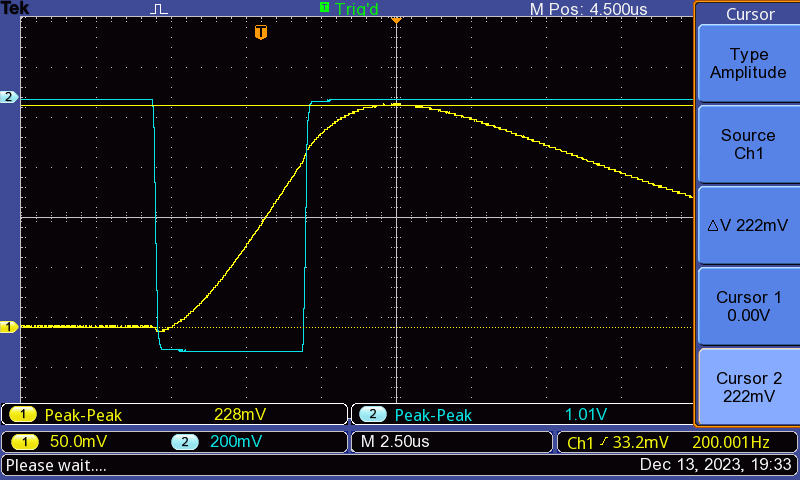

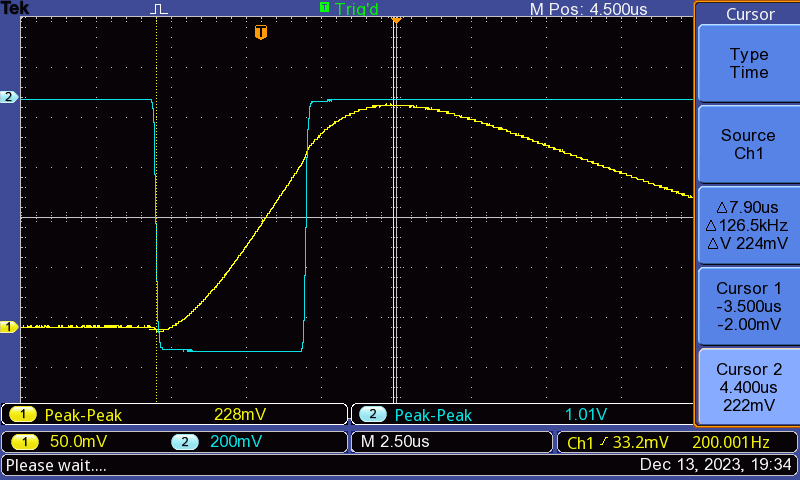

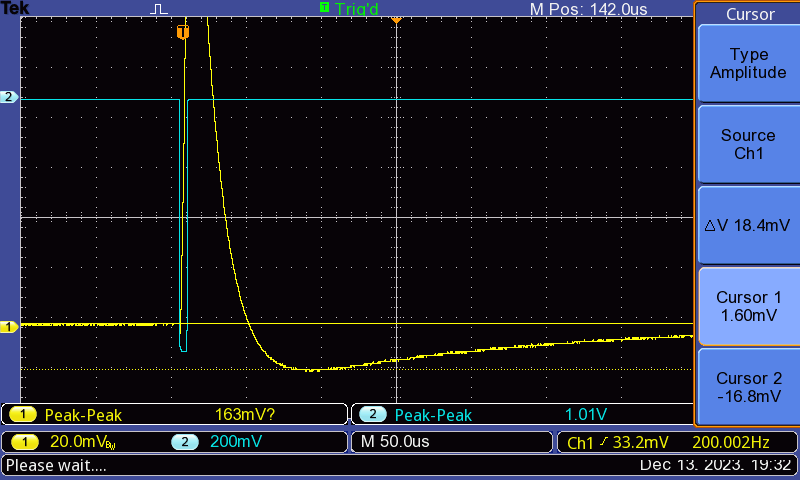

**Dagli screen sopra ricaviamo**

$V_{sh}^{max} = 222 \ mV$

$t_{sh}^{max} = 7.9 \ μs$

$A_{undershoot} = 18.4 \ mV$

Il valore di $R_{pz}$ è stato calcolato, come fornito dalla teoria, tramite l'ugiaglianza dei tempi caratteristici dello shaper e del preamplificatore, in particolare

$R_{pz} = \frac{\tau_{integratore}}{C_{shaper}}$

Per i nostri circuiti $R_{pz}$ risulta intorno agli $1 M\Omega$ (con media dei τ e $C$)

**Visualizzazione del segnale dopo la compensazione**

Ricerca del massimo

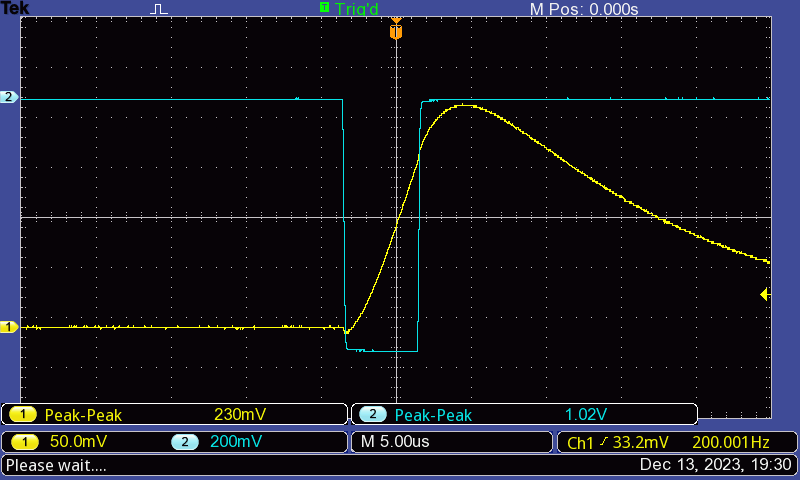

Varifica della compatibilità con la base line dopo 10 t max

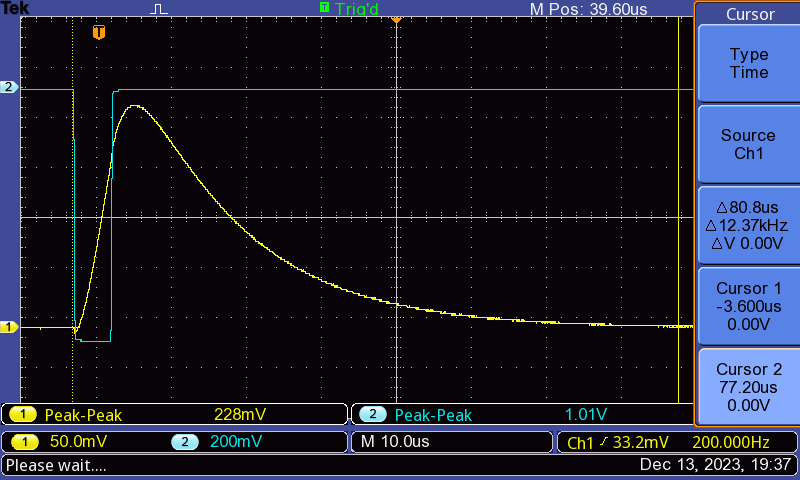

## ❌ **(2.4) effetto shaping time**

In [ ]:
r_shapet_dev = ? *1000 #kohm
r_shapet_int = ? *1000 #kohm

err_r_shapet_dev = math.sqrt(1/3) * math.sqrt( (r_shapet_dev*0.07/100)**2 + (0.8)**2 )
err_r_shapet_int = math.sqrt(1/3) * math.sqrt( (r_shapet_int*0.07/100)**2 + (0.8)**2 )

print("dev")
print( r_shapet_dev, " \pm ", err_r_shapet_dev )
print( 100*err_r_shapet_dev/r_shapet_dev )
print("int")
print( r_shapet_int, " \pm ", err_r_shapet_int )
print( 100*err_r_shapet_int/r_shapet_int )

Curva risultante (zoom in)

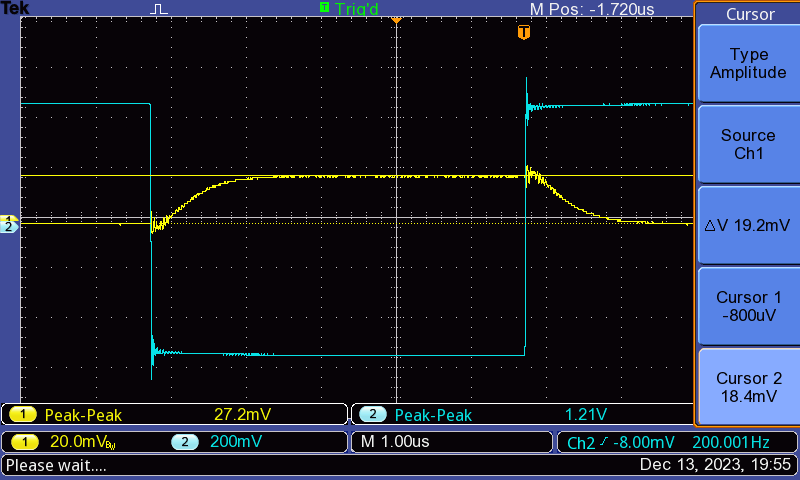

Curva risultante

?

#Analisi

##❌**(2.1)  shaper base**

Confronto della curva con la simulazione LTspice

In [ ]:
%%shell
curl  > "7-formatore"
curl  > "shape_base_max_osc"

In [ ]:
tempo_sb_ch1, vin_sb_ch1, vout_sb_ch1 = np.loadtxt( "7-formatore", skiprows=1, unpack=True)
tempo_sb_osc, vout_sb_osc = np.loadtxt( "shape_base_max_osc", skiprows=1, unpack=True)

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax2 = ax1.twinx()

ax1.plot(tempo_sb_ch1, vout_sb_ch1, marker="", linestyle="--", label="simulazione $V_{out} $", color="orange")
ax2.plot(tempo_sb_ch1, vin_sb_ch1, marker="", linestyle="--", label="simulazione $V_{in}$")

ax1.set_title("Simulazione")
ax1.set_xlabel("Tempo [s]")
ax1.set_ylabel("[V]")

ax2.set_ylabel("[V]")

plt.grid()
plt.legend()

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()

asse1, = ax1.plot(tempo_sb_ch1[:65] *([1000000]*len(vout_sb_ch1[:65])) , vout_sb_ch1[:65] *([2.40]*len(vout_sb_ch1[:65])) , marker="", linestyle=":", label="simulazione $V_{out} $", color="orange")
asse2, = ax2.plot(tempo_sb_ch1[:65] *([1000000]*len(vout_sb_ch1[:65])) , vin_sb_ch1[:65], marker="", linestyle=":", label="simulazione $V_{in}$")
asse3, = ax1.plot(tempo_sb_osc *([1000000]*len(vout_sb_osc)) , vout_sb_osc , marker="", linestyle="--", label="dati $V_{out} $", color="olive")

ax1.set_title("Simulazione")
ax1.set_xlabel("Tempo [$\mu$s]")
ax1.set_ylabel("$V_{out}$ [V]")

ax2.set_ylabel("$V_{in}$ [V]")

ax1.grid()
ax2.grid(axis="x")
ax1.legend(handles=[asse1, asse2, asse3], loc="center right")
#ax2.legend()

## 🟠 **(2.2) bode shaper**

In [25]:
#@title elaborazione dati

frequenza_hz_b = []
for i in frequenza_khz_b:
  dummy = 0
  dummy = i*1000
  frequenza_hz_b.append(dummy)
print("frequenza hz\n", frequenza_hz_b, "\n")

err_v_out_b = []
err_v_in_b = []

for i in range(len(v_out_div_b)):
  dummy = 0
  dummy = math.sqrt(1/3)* math.sqrt( (0.1*v_out_div_b[i])**2 + (0.03*v_out_b[i])**2 )               #ipotesi uniforme
  err_v_out_b.append(dummy)
print("err vout\n", err_v_out_b, "\n")
for i in range(len(v_in_div_b)):
  dummy = 0
  dummy = math.sqrt(1/3)* math.sqrt( (0.1*v_in_div_b[i])**2 + (v_in_b[i]*0.03)**2 )                 #ipotesi uniforme
  err_v_in_b.append(dummy)
print("err vin\n", err_v_in_b, "\n")

A_b = []
log_A_b = []

for i in range(len(v_out_b)):
  dummy = 0
  dummy = v_out_b[i] / v_in_b[i]
  A_b.append(dummy)
print("ampiezza\n", A_b, "\n")
for i in A_b:
  dummy = 0
  dummy = 20*math.log10(i)
  log_A_b.append(dummy)
print("log ampiezza\n", log_A_b, "\n")

err_A_b = []
err_log_A_b = []

for i in range(len(v_out_b)):
  dummy = 0
  dummy = A_b[i]*math.sqrt( (err_v_out_b[i]/v_out_b[i])**2 + (err_v_in_b[i]/v_in_b[i])**2 )         #propagazione semplice
  err_A_b.append(dummy)
print("err A\n", err_A_b, "\n")
for i in range(len(err_A_b)):
  dummy = 0
  dummy = 20 * err_A_b[i] / ( A_b[i]*math.log(10) )                                                 #propagazione semplice
  err_log_A_b.append(dummy)
print("err log A\n", err_log_A_b)

frequenza hz
 [215.0, 464.0, 1000, 2150.0, 4640.0, 5000, 10000, 11000, 17000, 21500.0, 23000, 29000, 35000, 46400.0, 100000, 215000, 464000, 1000000, 2150000, 4640000] 

err vout
 [0.0012137962486897598, 0.0013989786750816943, 0.0020243846801765056, 0.004589567880893945, 0.007697826533076289, 0.009450954096456788, 0.013054736049929669, 0.013491409612539874, 0.015075083194905869, 0.015588525694668282, 0.015043089221743428, 0.015524191873760557, 0.015203175106974639, 0.014437525180353222, 0.010640025062627125, 0.005733422479927092, 0.0028273014224403687, 0.0019232694385689524, 0.0016199818929029217, 0.0013989786750816943] 

err vin
 [0.02081665999466133, 0.02081665999466133, 0.02081665999466133, 0.02081665999466133, 0.02081665999466133, 0.02081665999466133, 0.02081665999466133, 0.02081665999466133, 0.02081665999466133, 0.02081665999466133, 0.02081665999466133, 0.02081665999466133, 0.02081665999466133, 0.02081665999466133, 0.02081665999466133, 0.02081665999466133, 0.02081665999466133, 0.0

###Determinazione della banda passanta tramite fit parabolico

In [26]:
def parabola_fit(x, a,b,c):
  return (a*(x**2)) + (b*x) + c

param, matrixcov = curve_fit( parabola_fit, np.log10(frequenza_hz_b[2:17]), log_A_b[2:17] )

print(param)
print(matrixcov)

[  -9.59690775   84.65942259 -188.61210578]
[[ 0.04715479 -0.40896202  0.86397629]
 [-0.40896202  3.58240051 -7.64562875]
 [ 0.86397629 -7.64562875 16.50134955]]


dividi poi per sqrt(n-k), questo è già radicato: 
1.7527770983145456
chi quadro 
 48.26031201115255
NDOF  
 13


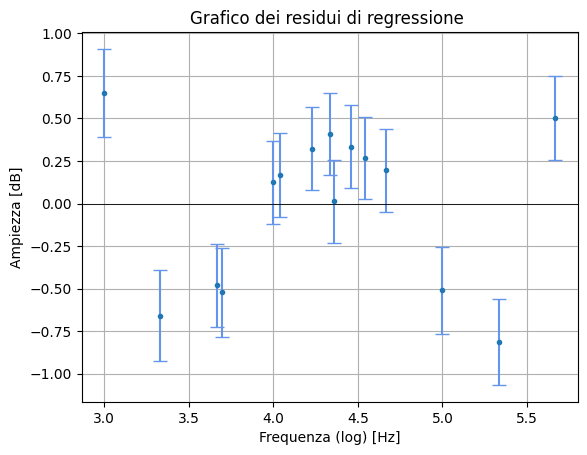

In [28]:
chi_quadro( log_A_b[2:17] , np.log10(frequenza_hz_b[2:17]), err_log_A_b[2:17], parabola_fit(np.log10(frequenza_hz_b[2:17]), -9.59690775 ,  84.65942259, -188.61210578), "Ampiezza [dB]", "Frequenza (log) [Hz]", "", False)

In [39]:
ampiezza_massima = -( ( 84.65942259 )**2 - ( 4* -9.59690775* -188.61210578  ) ) / ( 4* -9.59690775 )
print("ampiezza massima\n", ampiezza_massima)
print("ampiezza massima -3\n", ampiezza_massima-3)

intersec_1 = ( -84.65942259 + math.sqrt( (84.65942259)**2 - ( 4* -9.59690775* (-188.61210578 + 4.905668144601163) ) ) ) / ( 2*-9.59690775 )
intersec_2 = ( -84.65942259 - math.sqrt( (84.65942259)**2 - ( 4* -9.59690775* (-188.61210578 + 4.905668144601163) ) ) ) / ( 2*-9.59690775 )
print("intersec 1\n", intersec_1)
print("intersec 2\n", intersec_2)

print("il range di frequenza è quindi")
print( (10**intersec_1), " - " , (10**intersec_2)  )

ampiezza massima
 -1.9056681446011636
ampiezza massima -3
 -4.905668144601163
intersec 1
 3.851658627099208
intersec 2
 4.96987272397583
il range di frequenza è quindi
7106.546909319073  -  93298.08377473809


###Estrazione dei dati della simulazione

In [ ]:
%%shell
curl -l https://raw.githubusercontent.com/albertos-2002/SF3/main/elettronica/esperienza_7/simulazione/7-bode > "7-bode"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35980  100 35980    0     0   222k      0 --:--:-- --:--:-- --:--:--  223k


In [ ]:
freq_spice_nc, amp_spice_nc, fase_spice_nc = np.loadtxt( "7-bode", skiprows=1, unpack=True)

###grafico finale

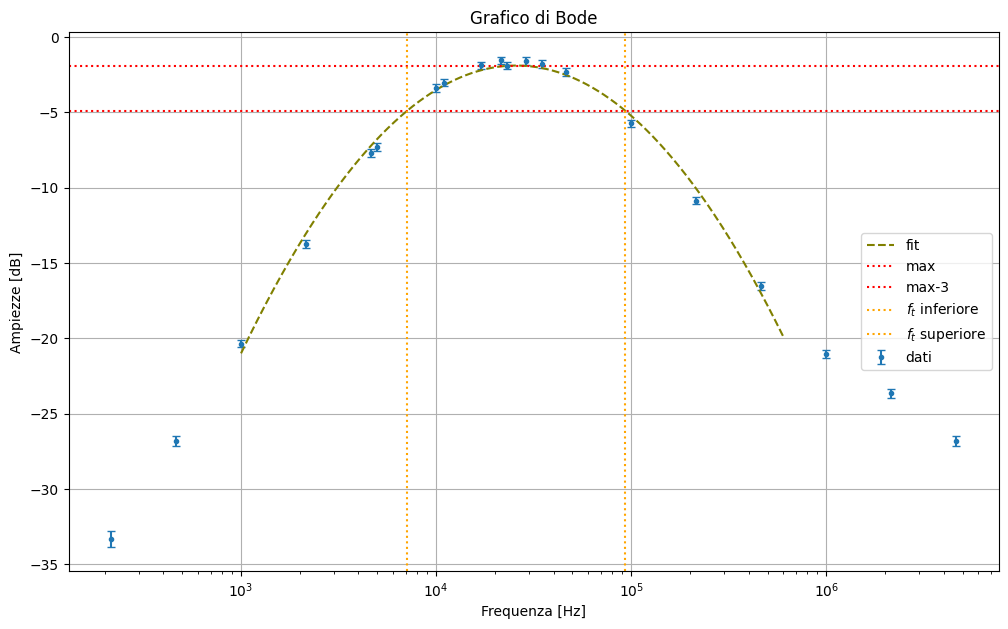

In [41]:
amp_spice_nc_t = []
#for i in amp_spice_nc:
#  dummy = 0
#  dummy = i+10
#  amp_spice_nc_t.append(dummy)

plt.figure(figsize=(12,7))

plt.errorbar(frequenza_hz_b, log_A_b, yerr=err_log_A_b, marker=".", linestyle="", label="dati", capsize=3)
plt.plot( np.linspace(1000, 600000, 100000), parabola_fit( np.log10( np.linspace(1000, 600000, 100000) ),  -9.59690775 ,  84.65942259, -188.61210578), linestyle="--", label="fit", color="olive" )

plt.axhline(y = ampiezza_massima, color="red", linestyle = ":", label="max")
plt.axhline(y = ampiezza_massima-3, color="red", linestyle = ":", label="max-3")

plt.axvline(x=(10**intersec_1), color='orange', linestyle=':', label="$f_t$ inferiore")
plt.axvline(x=(10**intersec_2), color='orange', linestyle=':', label="$f_t$ superiore")


#plt.plot( freq_spice_nc, amp_spice_nc_t, marker="", linestyle=":", label="simulazione", color="magenta" )

plt.xscale("log", base=10)
plt.title("Grafico di Bode")
plt.ylabel("Ampiezze [dB]")
plt.xlabel("Frequenza [Hz]")
plt.grid()
plt.legend()

## ✅ **(2.3) compensazione polo-zero**

Lo svolgimento del punto di trova nella sezione "Dati"

In [45]:
#calcolo della resistenza di polo-zero

tau_mediato = 0.5*(14.89916 + 15.1845) /100000
err_tau_mediato = ( 0.5*math.sqrt( (0.8979795436481585)**2 + (0.9036796024192743)**2 ) ) /1000000

c_mediato = 0.5*(150 + 148) / 1000000000000
err_c_mediato = 0.5*math.sqrt( ( 8.919828099987876e-12)**2 + ( 8.926785535678562e-12)**2 )

print("tau medio secondi")
print(tau_mediato, " \pm ", err_tau_mediato)
print("c mediato farad")
print(c_mediato, " \pm ", err_c_mediato)

rpz = ( tau_mediato ) / c_mediato
print("\n",rpz / 1000000, "  megaohm")

err_rpz = rpz * math.sqrt( (  err_tau_mediato/tau_mediato  )**2 + (  err_c_mediato/c_mediato  )**2 )
print(err_rpz / 1000000, "  megaohm")

print("errore relativo")
print(100*err_rpz/rpz)

tau medio secondi
0.0001504183  \pm  6.369858877242125e-07
c mediato farad
1.49e-10  \pm  6.309731240974795e-12

 1.0095187919463087   megaohm
0.042963507767133556   megaohm
errore relativo
4.255840318168002


Resistenza di compensazione misurata (serie)

In [47]:
rpz1 = 1.0040 *1000000 #megaohm scala 10mega
err_rpz1 = math.sqrt(1/3) * math.sqrt( (rpz1*1/100)**2 + (800)**2 )   #ipotesi uniforme

rpz2 = 119.35 *1000 #kohm scala 1000k
err_rpz2 = math.sqrt(1/3) * math.sqrt( (rpz2*0.07/100)**2 + (10)**2 )   #ipotesi uniforme

rpz = rpz1 + rpz2
err_rpz = math.sqrt( (err_rpz1)**2 + (err_rpz2)**2 )

print("rpz1  megaohm")
print(rpz1/1000000, " \pm ", err_rpz1/1000000)
print("rpz2  kiloohm")
print(rpz2/1000, " \pm ", err_rpz2/1000)
print("rpz tot  megaohm")
print(rpz/1000000, " \pm ", err_rpz/1000000)

rpz1  megaohm
1.004  \pm  0.005814969188797707
rpz2  kiloohm
119.35  \pm  0.04857903191364219
rpz tot  megaohm
1.12335  \pm  0.005815172103128877


### ✅ Grafico di bode

In [48]:
#@title elaborazione dati

frequenza_hz_bpz = []
for i in freq_bpz:
  dummy = 0
  dummy = i*1000
  frequenza_hz_bpz.append(dummy)
print("frequenza hz\n", frequenza_hz_bpz, "\n")

err_v_out_bpz = []
err_v_in_bpz = []

for i in range(len(v_out_div_bpz)):
  dummy = 0
  dummy = math.sqrt(1/3)* math.sqrt( (0.1*v_out_div_bpz[i])**2 + (0.03*v_out_bpz[i])**2 )               #ipotesi uniforme
  err_v_out_bpz.append(dummy)
print("err vout\n", err_v_out_bpz, "\n")
for i in range(len(v_in_div_bpz)):
  dummy = 0
  dummy = math.sqrt(1/3)* math.sqrt( (0.1*v_in_div_bpz[i])**2 + (v_in_bpz[i]*0.03)**2 )                 #ipotesi uniforme
  err_v_in_bpz.append(dummy)
print("err vin\n", err_v_in_bpz, "\n")

A_bpz = []
log_A_bpz = []

for i in range(len(v_out_bpz)):
  dummy = 0
  dummy = v_out_bpz[i] / v_in_bpz[i]
  A_bpz.append(dummy)
print("ampiezza\n", A_bpz, "\n")
for i in A_bpz:
  dummy = 0
  dummy = 20*math.log10(i)
  log_A_bpz.append(dummy)
print("log ampiezza\n", log_A_bpz, "\n")

err_A_bpz = []
err_log_A_bpz = []

for i in range(len(v_out_bpz)):
  dummy = 0
  dummy = A_bpz[i]*math.sqrt( (err_v_out_bpz[i]/v_out_bpz[i])**2 + (err_v_in_bpz[i]/v_in_bpz[i])**2 )         #propagazione semplice
  err_A_bpz.append(dummy)
print("err A\n", err_A_bpz, "\n")
for i in range(len(err_A_bpz)):
  dummy = 0
  dummy = 20 * err_A_bpz[i] / ( A_bpz[i]*math.log(10) )                                                 #propagazione semplice
  err_log_A_bpz.append(dummy)
print("err log A\n", err_log_A_bpz)

frequenza hz
 [10.0, 21.5, 46.4, 100.0, 215.0, 464.0, 1000, 2150.0, 4640.0, 10000, 21500.0, 46400.0, 100000, 215000] 

err vout
 [0.019791122589012812, 0.019791122589012812, 0.019791122589012812, 0.019791122589012812, 0.019791122589012812, 0.019678753348048587, 0.019566720045355927, 0.019566720045355927, 0.018901908192913576, 0.013179155258715686, 0.007762095936880278, 0.00430001550384802, 0.0015911019242441174, 0.0012137962486897598] 

err vin
 [0.033665016461206926, 0.033665016461206926, 0.033665016461206926, 0.033665016461206926, 0.033665016461206926, 0.033665016461206926, 0.033665016461206926, 0.033665016461206926, 0.033665016461206926, 0.033665016461206926, 0.033665016461206926, 0.033665016461206926, 0.033665016461206926, 0.033665016461206926] 

ampiezza
 [0.928, 0.928, 0.928, 0.928, 0.928, 0.92, 0.912, 0.912, 0.864, 0.684, 0.416, 0.184, 0.0632, 0.0216] 

log ampiezza
 [-0.6490404756227584, -0.6490404756227584, -0.6490404756227584, -0.6490404756227584, -0.6490404756227584, -0.7242

In [50]:
#@title fit 2 rette
x_orizzontali = np.log10( frequenza_hz_bpz[0:7] )
y_orizzontali = log_A_bpz[0:7]
err_y_orizzontali = err_log_A_bpz[0:7]

x_oblique_i = np.log10( frequenza_hz_bpz[10:] )
y_oblique_i = log_A_bpz[10:]
err_y_oblique_i = err_log_A_bpz[10:]

print("Regressione orizzontale")
print("la regressione lineare a due parametri non ha validità, inserita per avere una approssimazione di rho ed err_post")
regrlin_pear_errpost_xys(x_orizzontali, y_orizzontali, err_y_orizzontali)
param_oz, cov_oz = curve_fit(retta_fit_xa, x_orizzontali, y_orizzontali, sigma=err_y_orizzontali)
print("-----------------")
print(param_oz)
print(cov_oz)
print("--------------------------------------------------------------------------------------")
print("Regrezzione obliqua")
regrlin_pear_errpost_xys(x_oblique_i, y_oblique_i, err_y_oblique_i)
param_oi, cov_oi = curve_fit(retta_fit_xba, x_oblique_i, y_oblique_i, sigma=err_y_oblique_i)
print("-----------------")
print(param_oi)
print(cov_oi)
print("--------------------------------------------------------------------------------------")

Regressione orizzontale
la regressione lineare a due parametri non ha validità, inserita per avere una approssimazione di rho ed err_post
pendenza $b$	 -0.06461876799364452
$\sigma_b$	 0.19636406449149246
intercetta $a$	 -0.5521193370641067
$\sigma_a$	 0.41378502004300005
Coefficiente di Pearson $\rho_{xy}$	 -0.7842913452764986
$\sigma_{\rho_{xy}}$	 0.2774480440458646
Errore a posteriori $\delta$	 0.04036058152397879
-----------------
[-0.68129536]
[[0.00050299]]
--------------------------------------------------------------------------------------
Regrezzione obliqua
pendenza $b$	 -25.3881630495913
$\sigma_b$	 0.5668036547701112
intercetta $a$	 102.9007198077843
$\sigma_a$	 2.6842281297860815
Coefficiente di Pearson $\rho_{xy}$	 -0.9979525433709575
$\sigma_{\rho_{xy}}$	 0.045225662954992744
Errore a posteriori $\delta$	 0.9292327791017307
-----------------
[-25.38816304 102.90071977]
[[ 1.70346247 -8.04669947]
 [-8.04669947 38.20376233]]
-----------------------------------------------

chi quadro 
 0.17618419496079862
NDOF  
 5


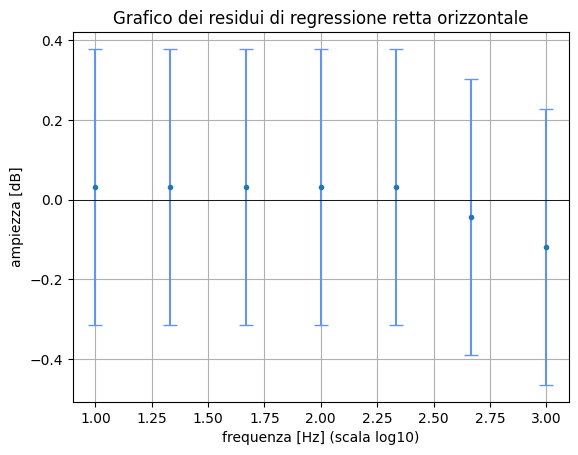

In [51]:
chi_quadro_lineare(log_A_bpz[0:7], np.log10( frequenza_hz_bpz[0:7] ), err_log_A_bpz[0:7], -0.68129536, 0, "ampiezza [dB]", "frequenza [Hz] (scala log10)", "retta orizzontale")

chi quadro 
 10.60467224750957
NDOF  
 2


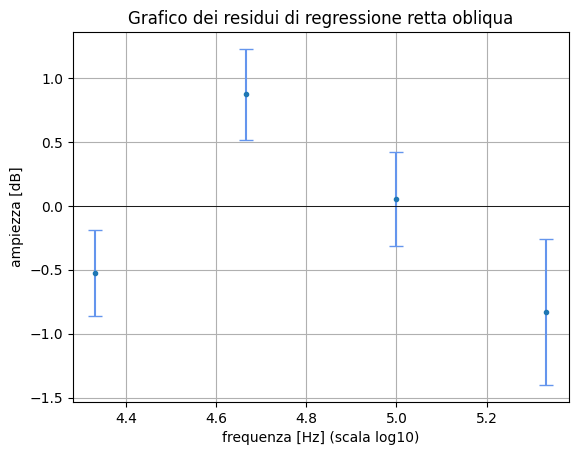

In [52]:
chi_quadro_lineare(log_A_bpz[10:], np.log10( frequenza_hz_bpz[10:] ), err_log_A_bpz[10:], 102.90071977, -25.38816304, "ampiezza [dB]", "frequenza [Hz] (scala log10)", "retta obliqua")

Intersechiamo la parte obliqua con il massimo -3 dB

In [57]:
intersezione_2rette(102.90071977, math.sqrt(38.20376233), -25.38816304, math.sqrt(1.70346247), -8.04669947, -0.68129536-3, math.sqrt(0.00050299), 0, 0, 0)

---------------------------------------------
x intersezione
4.19809873451955
incertezza
8.053855042164976
---------------------------------------------


###   estrazione dati simulazione

In [ ]:
%%shell
curl  > "7-bode_compensato"

In [ ]:
freq_spice_pz, amp_spice_pz, fase_spice_pz = np.loadtxt( "7-bode_compensato", skiprows=1, unpack=True)

### 🟠 Grafico

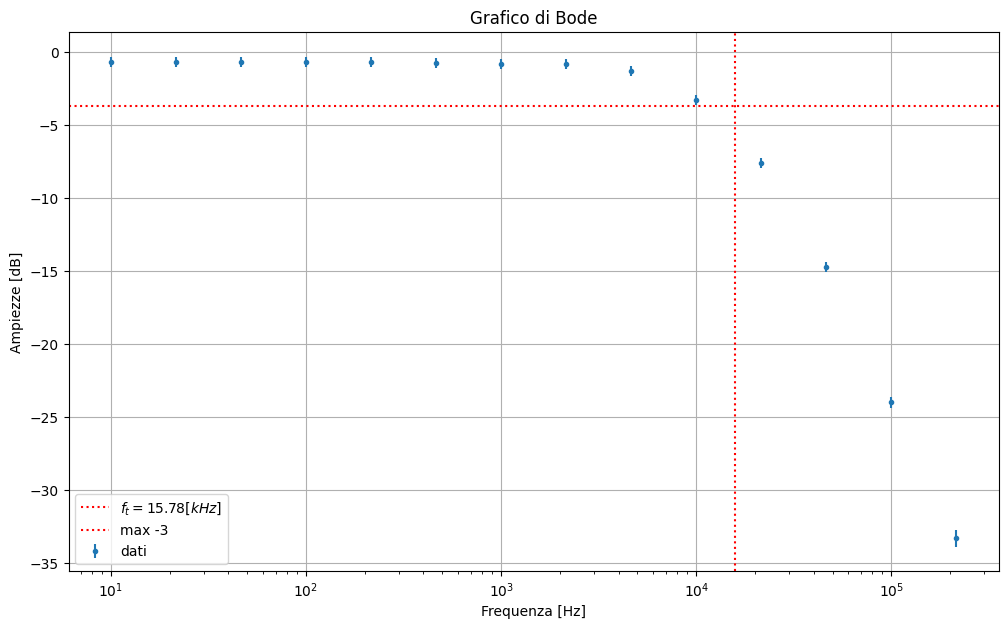

In [62]:
#amp_spice_nc_t = []
#for i in amp_spice_nc:
#  dummy = 0
#  dummy = i+10
#  amp_spice_nc_t.append(dummy)

plt.figure(figsize=(12,7))

plt.errorbar(frequenza_hz_bpz, log_A_bpz, yerr=err_log_A_bpz, marker=".", linestyle="", label="dati")
plt.axvline(x=10**4.19809873451955, color='red', linestyle=':', label="$ f_t = 15.78 [kHz] $")
plt.axhline(y=-0.68129536-3, color="red", linestyle=":", label="max -3")

#plt.plot( freq_spice_pz, amp_spice_pz, marker="", linestyle=":", label="simulazione", color="magenta" )

plt.xscale("log", base=10)
plt.title("Grafico di Bode")
plt.ylabel("Ampiezze [dB]")
plt.xlabel("Frequenza [Hz]")
plt.grid()
plt.legend()

## ❌ **(2.4) effetto shaping time**

Confronto con la simulazione LTspice

In [ ]:
%%shell
curl  > "sht-ch1"
curl  > "sht-ch2"
curl  > "7-formatore_shape_intime_45"

In [ ]:
tempo_sht_ch1, vout_sht_ch1 = np.loadtxt( "sht-ch1", skiprows=1, unpack=True)
tempo_sht_ch2, vout_sht_ch2 = np.loadtxt( "sht-ch2", skiprows=1, unpack=True)
tempo_sht_spice, vout_sht_spice, vin_sht_spice = np.loadtxt( "7-formatore_shape_intime_45", skiprows=1, unpack=True)

In [ ]:
tempo_sht_spice_mod = []
for i in tempo_sht_spice:
  dummy = 0
  dummy = ( i - (2.05e-5) ) *1000000
  tempo_sht_spice_mod.append(dummy)
vout_sht_spice_mod = []
for i in vout_sht_spice:
  dummy = 0
  dummy = (i-0.0015) *(2.35)
  vout_sht_spice_mod.append(dummy)

In [ ]:
fig, ax1 = plt.subplots( figsize=(16,6) )
ax2 = ax1.twinx()

asse1, = ax1.plot(tempo_sht_ch1 *([1000000]*len(tempo_sht_ch1)), vout_sht_ch1, marker="", linestyle="--", color="orange", label="dati $V_{out}$")
asse2, = ax2.plot(tempo_sht_ch2 *([1000000]*len(tempo_sht_ch2)), vout_sht_ch2, marker="", linestyle="--", label="dati $V_{in}$")
asse3, = ax1.plot(tempo_sht_spice_mod , vout_sht_spice_mod, marker="", linestyle="--", color="purple", label="simulazione")

ax1.set_title("Dati oscilloscopio - simulazione")
ax1.set_xlabel("Tempo [$\mu$s]")
ax1.set_ylabel("$V_{out} \ \ [V]$")
ax2.set_ylabel("$V_{in} \ \ [V]$")
ax1.grid()
ax2.grid(axis="x")
ax1.legend(handles=[asse1, asse2, asse3], loc="center right")

#Librerie

In [19]:
def chi_quadro(y_vec, x_vec, sigma_vec, y_ref, stringa_ytitle, stringa_xtitle, stringa_titolo, bolean_parameter):

  import math
  import matplotlib.pyplot as plt

#La formula della retta utilizzata è: y = a + bx
#dati
  y = list(y_vec)
  x = list(x_vec)
  sigma = list(sigma_vec)
  dimensione = len(y)

#calcolo del chi quadro
  vettore_scarti_quadratici = []
  vettore_scarti = []
  vettore_err_post = []
  for i in range(dimensione):
    dummy_2 = 0
    dummy_3 = 0
    dummy_4 = 0
    dummy_2 = y[i] - y_ref[i]
    dummy_15 = dummy_2**2
    vettore_err_post.append(dummy_15)
    dummy_3 = dummy_2 / sigma[i]
    dummy_4 = dummy_3**2
    vettore_scarti_quadratici.append(dummy_4)
    vettore_scarti.append(dummy_2)

  print("dividi poi per sqrt(n-k), questo è già radicato: ")
  print(math.sqrt( sum(vettore_err_post) ))

  chi_quadro = sum(vettore_scarti_quadratici)
  print("chi quadro \n", chi_quadro)
  print("NDOF  \n", dimensione-2)

#print del grafico degli scarti
  ascisse = x

  plt.errorbar(ascisse, vettore_scarti, marker=".", linestyle="none", yerr=sigma, ecolor="cornflowerblue", capsize=5)
  if bolean_parameter == True:
    plt.xscale("log", base=10)
  plt.title("Grafico dei residui di regressione " + stringa_titolo )
  plt.ylabel(stringa_ytitle)
  plt.xlabel(stringa_xtitle)
  plt.axhline(0, color='black', linewidth="0.6")
  plt.grid()

In [6]:
def regrlin_pear_errpost_xys(input_x, input_y, input_sigma) :
  import math
  import sys
  #dati input
  x = list(input_x)
  y = list(input_y)
  sigma = list(input_sigma)
  dimensione = len(x)
  if len(x) != len(y):
    print("X E Y DIMENSIONE DIVERSA")
    sys.exit()
  if len(x) != len(sigma):
    print("X E SIGMA DIMENSIONE DIVERSA")
    sys.exit()
  #REGRESSIOBNE LINEARE
  #calcolo del delta
  parametro_1 = 0
  parametro_2 = 0
  parametro_3 = 0
  for i in range(dimensione): #primo termine del delta
    dummy_1 = 0
    dummy_1 = 1/ pow(sigma[i],2)
    parametro_1 = dummy_1 + parametro_1
  for i in range(dimensione): #secondo termine del delta
    dummy_2 = 0
    dummy_2 = pow(x[i],2) / pow(sigma[i],2)
    parametro_2 = dummy_2 + parametro_2
  dummy_3_1 = 0
  for i in range(dimensione): #terzo termine del delta
    dummy_3 = 0
    dummy_3 = x[i] / pow(sigma[i],2)
    dummy_3_1 = dummy_3 + dummy_3_1
  parametro_3 = pow(dummy_3_1,2)
  delta = (parametro_1*parametro_2) - parametro_3
  delta_1 = 1/delta
  #calcolo di b
  parametro_4 = 0
  parametro_5 = 0
  parametro_6 = 0
  parametro_7 = 0
  for i in range(dimensione): #calcolo del primo termine di a
    dummy_4 = 0
    dummy_4 = 1/pow(sigma[i],2)
    parametro_4 = dummy_4 + parametro_4
  for i in range(dimensione): #calcolo del secondo termine di a
    dummy_5 = 0
    dummy_5 = (x[i]*y[i]) / pow(sigma[i],2)
    parametro_5 = dummy_5 + parametro_5
  for i in range(dimensione): #calcolo del terzo termine di a
    dummy_6 = 0
    dummy_6 = x[i] / pow(sigma[i],2)
    parametro_6 = dummy_6 + parametro_6
  for i in range(dimensione): #calcolo del quarto termine di a
    dummy_7 = 0
    dummy_7 = y[i] / pow(sigma[i],2)
    parametro_7 = dummy_7 + parametro_7
  dummy_b1 = delta_1*parametro_4*parametro_5
  dummy_b2 = delta_1*parametro_6*parametro_7
  b = dummy_b1-dummy_b2
	#calcolo di a
  parametro_8 = parametro_2
  parametro_9 = parametro_7
  parametro_10 = parametro_6
  parametro_11 = parametro_5
  dummy_a1 = delta_1*parametro_8*parametro_9
  dummy_a2 = delta_1*parametro_10*parametro_11
  a = dummy_a1-dummy_a2
  #calcolo incertezza e covarianza
  #sigma b
  sigma_b = math.sqrt(delta_1*parametro_1)
  #sigma a
  sigma_a = math.sqrt(delta_1*parametro_8)
  #covrianza
  #al mmento non disponibile
  #COEFFICIENTE DI CORRELLAZIONE DI PEARSON
  media_x = sum(x) / dimensione
  media_y = sum(y) / dimensione
  numeratore = 0
  denominatore = 0
  dummy_denx = 0
  dummy_deny = 0
  for i in range(dimensione):
    dummy_x = x[i]-media_x
    dummy_y = y[i]-media_y
    dummy_numeratore = dummy_x*dummy_y
    numeratore = dummy_numeratore + numeratore
    dummy_x2 = pow(dummy_x,2)
    dummy_y2 = pow(dummy_y,2)
    dummy_denx = dummy_x2 + dummy_denx
    dummy_deny = dummy_y2 + dummy_deny
  dummy_denominatore = dummy_denx * dummy_deny
  denominatore = math.sqrt(dummy_denominatore)
  rxy = numeratore / denominatore
  numeratore_sigma = 1 - pow(rxy,2)
  denominatore_sigma = dimensione - 2
  sigma_rxy = math.sqrt(numeratore_sigma/denominatore_sigma)
  #ERRORE A POSTERIORI
  parametro_12 = 1 / (dimensione - 2)
  y_riferimento = []
  for i in range(dimensione):
    dummy_y = 0
    dummy_y = a + (b*x[i])
    y_riferimento.append(dummy_y)
  scarti_quadrati = 0
  for i in range(dimensione):
    dummy_sq = y[i] - y_riferimento[i]
    dummy_sq2 = pow(dummy_sq,2)
    scarti_quadrati = dummy_sq2 + scarti_quadrati
  errore_posteriori = math.sqrt(parametro_12*scarti_quadrati)
  #print dei risultati
  print("pendenza $b$\t", b)
  print("$\sigma_b$\t", sigma_b)
  print("intercetta $a$\t", a)
  print("$\sigma_a$\t", sigma_a)
  #print("covarianza", )
  print("Coefficiente di Pearson $\\rho_{xy}$\t",  rxy)
  print("$\sigma_{\\rho_{xy}}$\t", sigma_rxy)
  print("Errore a posteriori $\delta$\t",  errore_posteriori)

In [7]:
def retta_fit_xba(x, b,a):
  y = []
  for i in range(len(x)):
    dummy = 0
    dummy = (x[i]*b) + a
    y.append(dummy)
  return y
def retta_fit_xa(x, a):
  y = []
  for i in range(len(x)):
    dummy = 0
    dummy = (x[i]*0) + a
    y.append(dummy)
  return y

In [18]:
def chi_quadro_lineare(y_vec, x_vec, sigma_vec, inte, pend, stringa_ytitle, stringa_xtitle, stringa_titolo):

	import math
	import matplotlib.pyplot as plt

#La formula della retta utilizzata è: y = a + bx
#dati
	y = list(y_vec)
	x = list(x_vec)
	sigma = list(sigma_vec)
	intercetta = inte
	pendenza = pend
	dimensione = len(y)

#calcolo del riferimento
	y_ref = []
	for i in x:
		dummy_1 = 0
		dummy_1 = (i*pendenza) + intercetta
		y_ref.append(dummy_1)

#calcolo del chi quadro
	vettore_scarti_quadratici = []
	vettore_scarti = []
	for i in range(dimensione):
		dummy_2 = 0
		dummy_3 = 0
		dummy_4 = 0
		dummy_2 = y[i] - y_ref[i]
		dummy_3 = dummy_2 / sigma[i]
		dummy_4 = dummy_3**2
		vettore_scarti_quadratici.append(dummy_4)
		vettore_scarti.append(dummy_2)

	chi_quadro = sum(vettore_scarti_quadratici)
	print("chi quadro \n", chi_quadro)
	print("NDOF  \n", dimensione-2)

#print del grafico degli scarti
	ascisse = x

	plt.errorbar(ascisse, vettore_scarti, marker=".", linestyle="none", yerr=sigma, ecolor="cornflowerblue", capsize=5)
	plt.title("Grafico dei residui di regressione " + stringa_titolo )
	plt.ylabel(stringa_ytitle)
	plt.xlabel(stringa_xtitle)
	plt.axhline(0, color='black', linewidth="0.6")
	plt.grid()

In [54]:
def intersezione_2rette(int1, err_int1, pend1, err_pend1, cov1, int2, err_int2, pend2, err_pend2, cov2):
  import math

  x_intersezione = 0
  err_x_intersezione = 0

  #calcolo intersezione
  x_intersezione = (int2 - int1) / (pend1 - pend2)

  #calcolo errore
  dummy1 = 0
  dummy2 = 0
  dummy3 = 0
  dummy4 = 0
  dummy5 = 0
  dummy6 = 0

  dummy1 = ( err_pend1 / (pend1 - pend2) )**2
  dummy2 = ( err_pend2 / (pend1 - pend2) )**2
  dummy3 = ( err_int2 * ( (int2 - int1) / (pend1 - pend2)**2 ) )**2
  dummy4 = ( err_pend1* ( ( int2 - int1 ) / ( pend1 - pend2 )**2 ) )**2
  dummy5 = cov1*err_pend1*err_int1
  dummy6 = cov2*err_pend2*err_int2

  err_x_intersezione = math.sqrt( abs(dummy1 + dummy2 + dummy3 + dummy4 + dummy5 + dummy6) )

  #print dei risultati
  print("---------------------------------------------")
  print("x intersezione")
  print(x_intersezione)
  print("incertezza")
  print(err_x_intersezione)
  print("---------------------------------------------")